   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked Survived_status  
0      0         A/5 21171   7.2500   NaN        S              No  
1      0          PC 17599  71.2833   C85        C             Yes  
2      0  STON/O2. 3101282   7.9250   NaN        S             Yes  
3      0            113803  53.1000  C123        S             Yes  


(1309, 13)


Survival Status: 
 0    815
1    494
Name: Survived, dtype: int64
Passeng

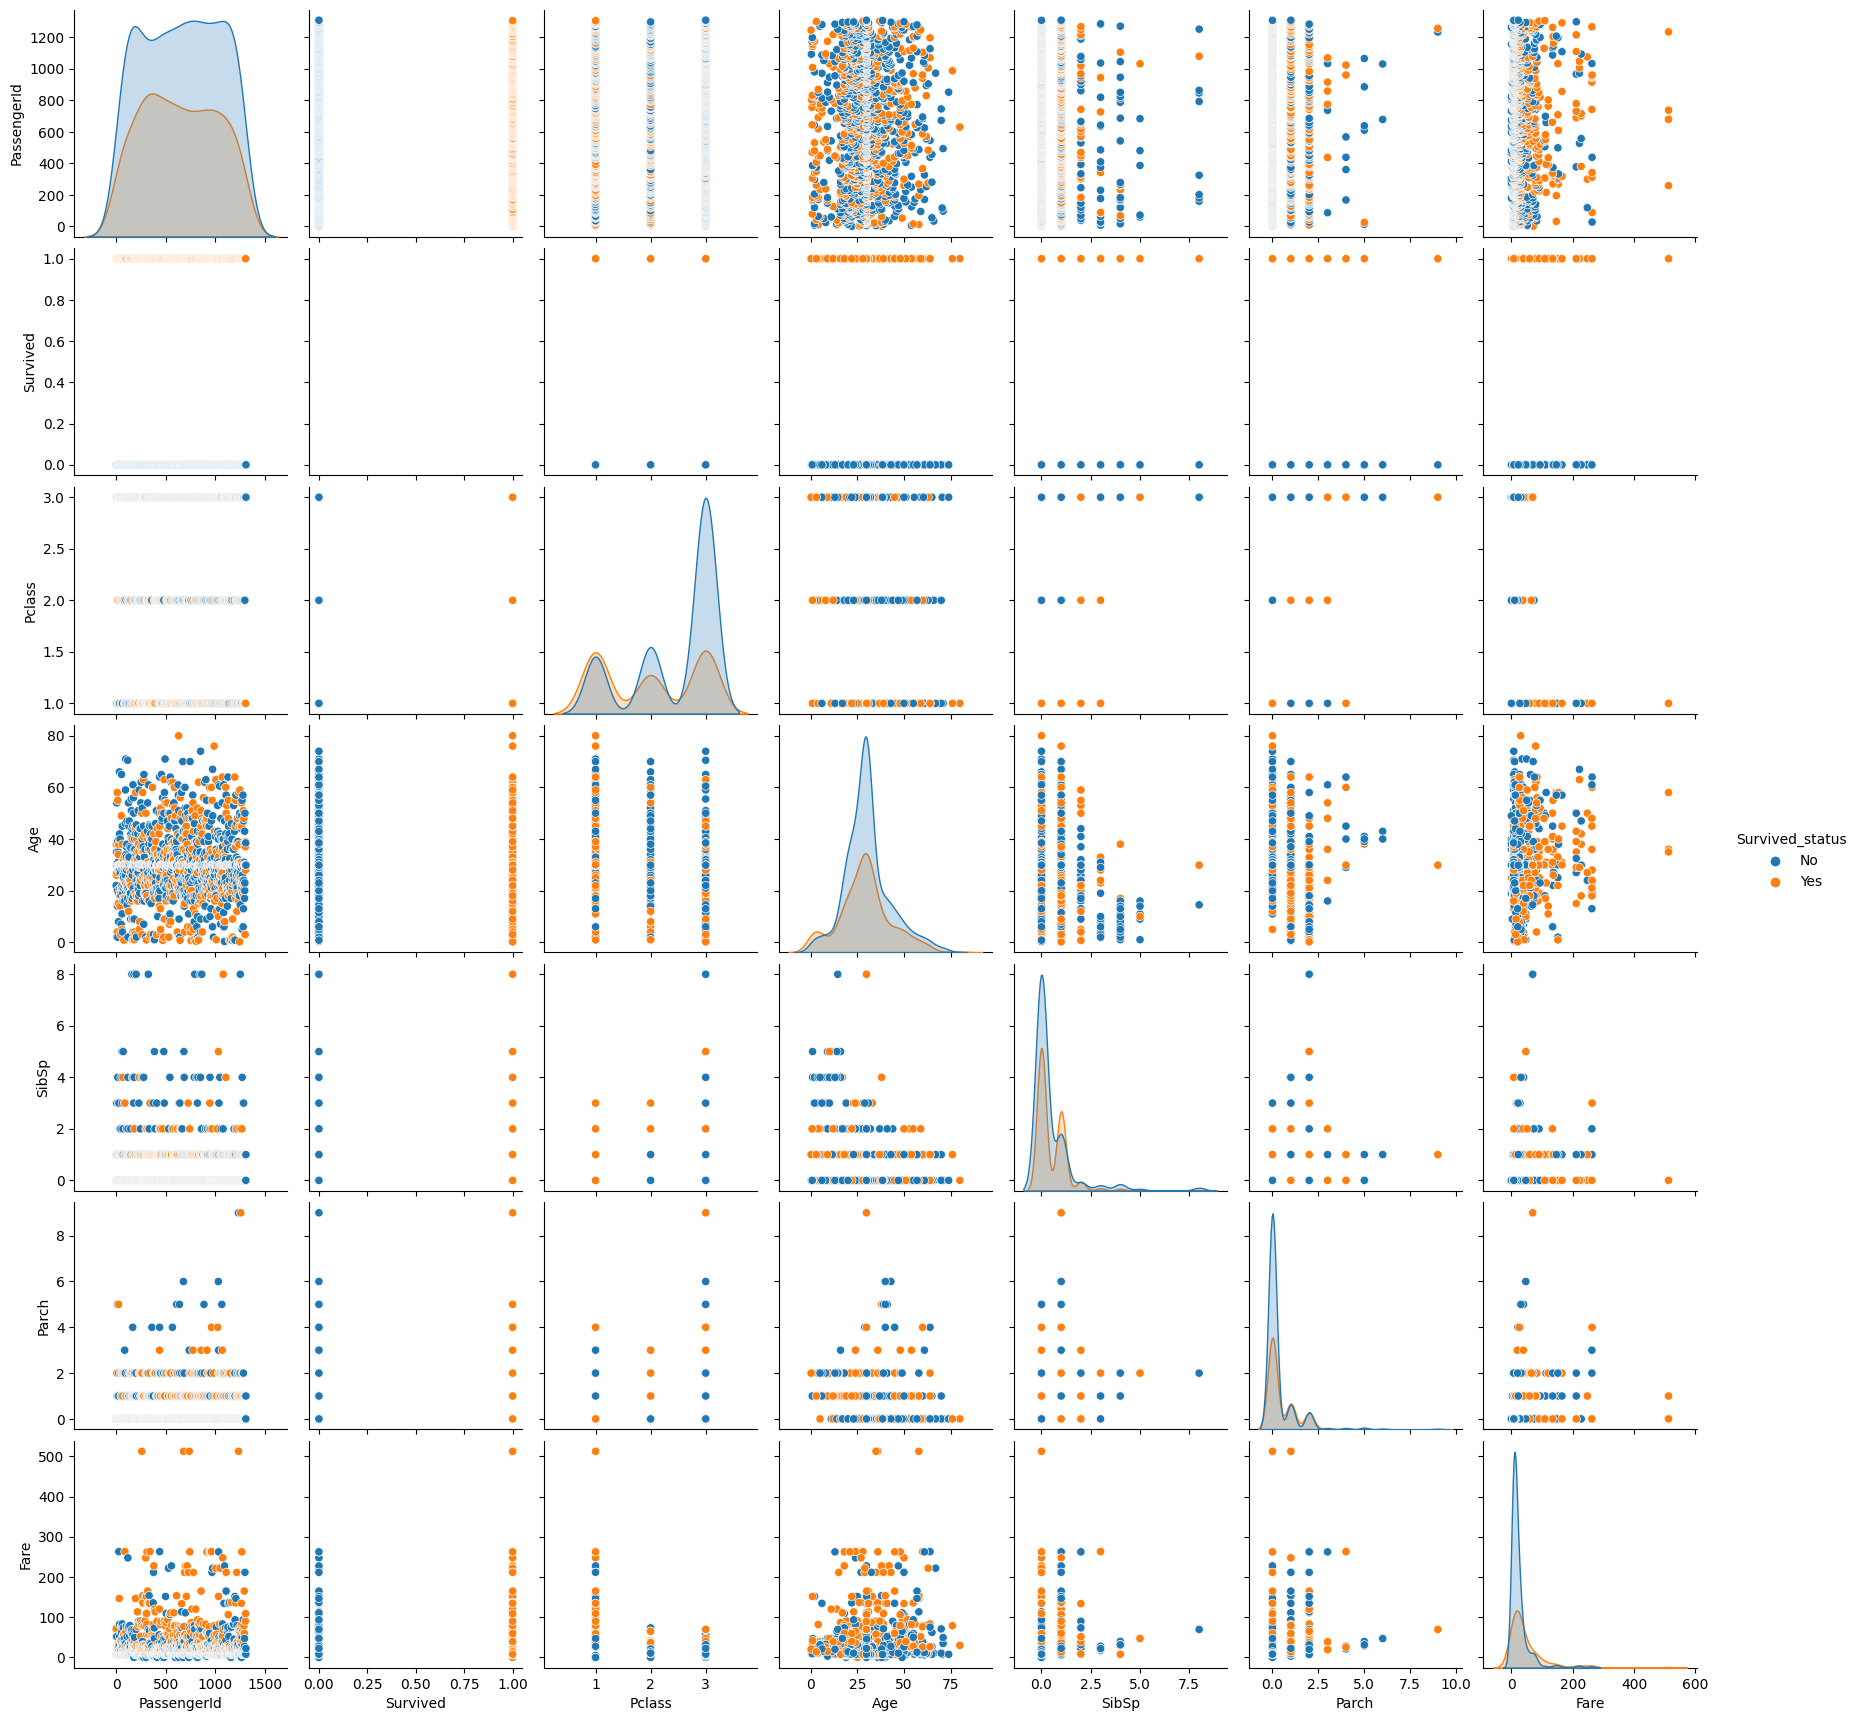

In [12]:
# Python Bharat Intern Data Science Project ( KAPIL GUPTA)
# MAKE SURE TO RUN THE CODE FROM STARTING; NOT FROM MIDDLE.

# CLASSIFICATION -> LOGISTIC REGRESSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. TAKE THE DATA AND CREATE A DATAFRAME
# To load the TITANIC Survival dataset into a pandas dataFrame

titanic_df = pd.read_csv("https://raw.githubusercontent.com/kapilgupta50347/Bharat_Intern/main/Titanic_survival_dataset.csv")
titanic_df['Survived_status']=titanic_df['Survived'].apply(lambda x: "No" if x==0 else "Yes")
print(titanic_df.head(4))
print('\n')

# To check the number of datapoints and number of attributes or features available in the dataset
print(titanic_df.shape)
print('\n')

# 2. PREPROCESSING - FILTERING OF DATA,FILLING missing values, EDA
# performing Exploratory Data Analysis (EDA)

# Survived Status: 0(Not Survived) and 1(Survived)
print("Survival Status: \n",titanic_df['Survived'].value_counts())
print("Passenger Class: ",*titanic_df['Pclass'].unique())
print("Embarked City: ",*titanic_df['Embarked'].unique())
print("# of parents / children aboard the Titanic: ",*titanic_df['Parch'].unique())
print("# of siblings / spouses aboard the Titanic: ",*titanic_df['SibSp'].unique())

# imputing "Age" with mean as it contains some null values
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)

# imputing "Embarked" with mode as it contains some null values
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# 3. DATA VISUALIZATION
sns.pairplot(titanic_df,hue='Survived_status')

titanic_df_temp=titanic_df

<ipython-input-13-b93f7cac3a8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation matrix: \n",titanic_df.corr())
<ipython-input-13-b93f7cac3a8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nHeat Map: \n",sns.heatmap(titanic_df.corr(),annot=True))


Correlation matrix: 
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.020370 -0.038354  0.025731 -0.055224  0.008942   
Survived       -0.020370  1.000000 -0.264710 -0.048483  0.002370  0.108919   
Pclass         -0.038354 -0.264710  1.000000 -0.366371  0.060832  0.018322   
Age             0.025731 -0.048483 -0.366371  1.000000 -0.190747 -0.130872   
SibSp          -0.055224  0.002370  0.060832 -0.190747  1.000000  0.373587   
Parch           0.008942  0.108919  0.018322 -0.130872  0.373587  1.000000   
Fare            0.031075  0.233808 -0.558715  0.170726  0.160371  0.221653   

                 Fare  
PassengerId  0.031075  
Survived     0.233808  
Pclass      -0.558715  
Age          0.170726  
SibSp        0.160371  
Parch        0.221653  
Fare         1.000000  

Heat Map: 
 Axes(0.125,0.11;0.62x0.77)


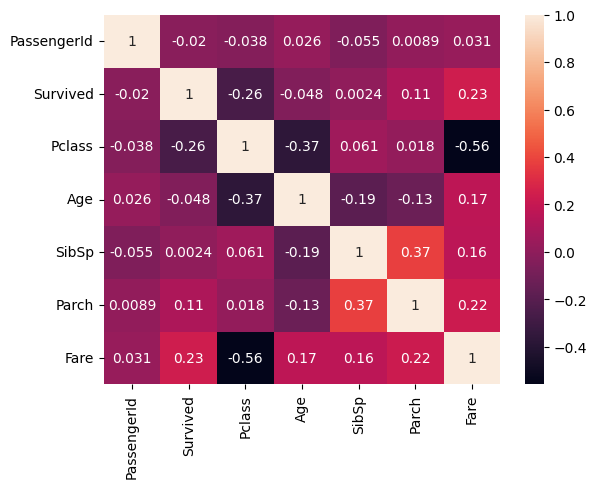

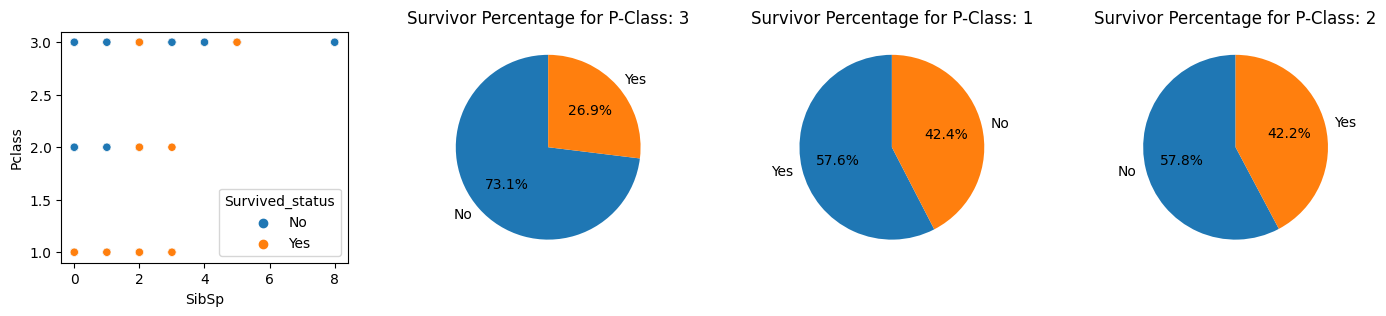

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name     Sex        Age  \
0                               Braund, Mr. Owen Harris    male  22.000000   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                                Heikkinen, Miss. Laina  female  26.000000   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                              Allen, Mr. William Henry    male  35.000000   
...                                                 ...     ...

In [13]:
# Finding correlation and making heat and pie charts.
print("Correlation matrix: \n",titanic_df.corr())
print("\nHeat Map: \n",sns.heatmap(titanic_df.corr(),annot=True))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,3))
class_1= titanic_df.loc[(titanic_df['Pclass']==1) ,:]['Survived_status'].value_counts()
class_2= titanic_df.loc[(titanic_df['Pclass']==2) ,:]['Survived_status'].value_counts()
class_3= titanic_df.loc[(titanic_df['Pclass']==3) ,:]['Survived_status'].value_counts()
plt.subplot(1,4,1)
sns.scatterplot(x='SibSp',y='Pclass',data=titanic_df,hue='Survived_status').set(title="")
plt.subplot(1,4,2)
plt.pie(class_3.values,labels=class_3.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 3")
plt.subplot(1,4,3)
plt.pie(class_1.values,labels=class_1.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 1")
plt.subplot(1,4,4)
plt.pie(class_2.values,labels=class_2.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 2")
plt.show()

# Creating new columns for more enhancement.
titanic_df['initials'] = titanic_df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch'] +1
print(titanic_df)

titanic_df_temp=titanic_df

In [14]:
titanic_df=titanic_df_temp

titanic_df['family_size'] = titanic_df['family_size'].apply(lambda x: 0 if x>1 else 1)
titanic_df.rename(columns = {'family_size':'isAlone'}, inplace=True)
print(titanic_df)

titanic_df['initials'].value_counts()

# Creating new columns to make individual values in numeric form to apply logistic regression algorithm.
titanic_df1 = titanic_df.copy()
titanic_df1['Sex']=titanic_df1['Sex'].apply(lambda x: 1 if x=="female" else 0)
titanic_df1['pclass=1'] = (titanic_df1['Pclass']==1).astype('int')
titanic_df1['pclass=2'] = (titanic_df1['Pclass']==2).astype('int')
titanic_df1['pclass=3'] = (titanic_df1['Pclass']==3).astype('int')
titanic_df1['Embarked=S'] = (titanic_df1['Embarked']=='S').astype('int')
titanic_df1['Embarked=C'] = (titanic_df1['Embarked']=='C').astype('int')
titanic_df1['Embarked=Q'] = (titanic_df1['Embarked']=='Q').astype('int')
titanic_df1['initials=Master'] = (titanic_df1['initials']=='Master').astype('int')
titanic_df1['initials=Mr'] = (titanic_df1['initials']=='Mr').astype('int')
titanic_df1['initials=Miss'] = (titanic_df1['initials']=='Miss').astype('int')
titanic_df1['initials=Mrs'] = (titanic_df1['initials']=='Mrs').astype('int')
print(titanic_df1.head())

print(titanic_df1.columns)

titanic_df1.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked','Survived_status','initials'],axis=1,inplace=True)
print(titanic_df1.head)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name     Sex        Age  \
0                               Braund, Mr. Owen Harris    male  22.000000   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                                Heikkinen, Miss. Laina  female  26.000000   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                              Allen, Mr. William Henry    male  35.000000   
...                                                 ...     ...

Final Features considered for Model Fitting: 
 Index(['Survived', 'Sex', 'Age', 'Fare', 'isAlone', 'pclass=1', 'pclass=2',
       'pclass=3', 'Embarked=S', 'Embarked=C', 'Embarked=Q', 'initials=Master',
       'initials=Mr', 'initials=Miss', 'initials=Mrs'],
      dtype='object')
   Survived  Sex   Age     Fare  isAlone  pclass=1  pclass=2  pclass=3  \
0         0    0  22.0   7.2500        0         0         0         1   
1         1    1  38.0  71.2833        0         1         0         0   
2         1    1  26.0   7.9250        1         0         0         1   

   Embarked=S  Embarked=C  Embarked=Q  initials=Master  initials=Mr  \
0           1           0           0                0            1   
1           0           1           0                0            0   
2           1           0           0                0            0   

   initials=Miss  initials=Mrs  
0              0             0  
1              0             1  
2              1             0  
Corre

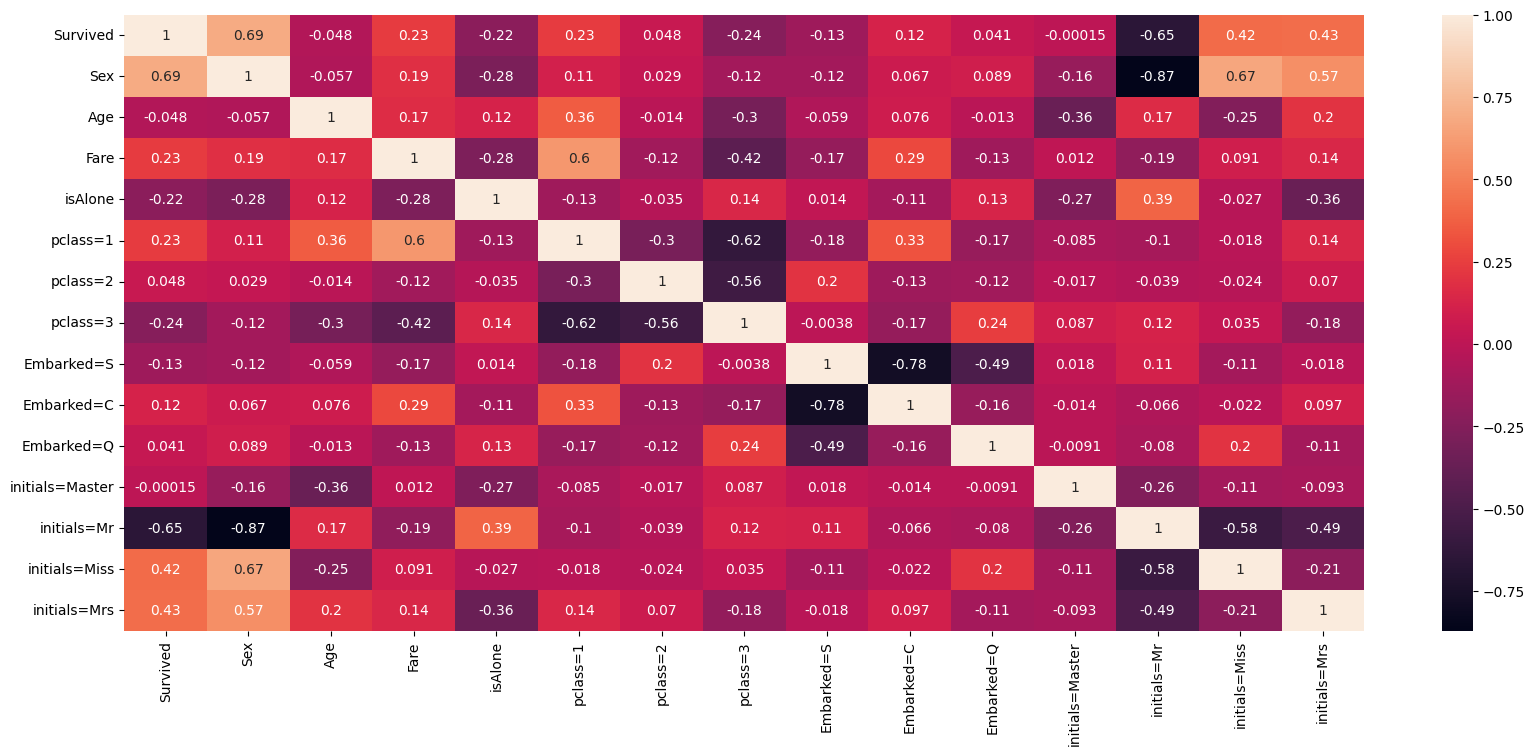

None


In [15]:
# Checking final features and attributes and making heatmap.
print("Final Features considered for Model Fitting: \n",titanic_df1.columns )
d_train = titanic_df1.copy()
print(d_train.head(3))

print("Correlation matrix: \n")
print(titanic_df1.corr())

fig = plt.figure(figsize=(20,8))
print("\nHeat Map: \n")
sns.heatmap(titanic_df1.corr(),annot=True)
print(plt.show())

In [16]:
# Checking finally for missing values before traning and testing the model.
titanic_df1.info()
titanic_df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         1309 non-null   int64  
 1   Sex              1309 non-null   int64  
 2   Age              1309 non-null   float64
 3   Fare             1309 non-null   float64
 4   isAlone          1309 non-null   int64  
 5   pclass=1         1309 non-null   int64  
 6   pclass=2         1309 non-null   int64  
 7   pclass=3         1309 non-null   int64  
 8   Embarked=S       1309 non-null   int64  
 9   Embarked=C       1309 non-null   int64  
 10  Embarked=Q       1309 non-null   int64  
 11  initials=Master  1309 non-null   int64  
 12  initials=Mr      1309 non-null   int64  
 13  initials=Miss    1309 non-null   int64  
 14  initials=Mrs     1309 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 153.5 KB


Survived           0
Sex                0
Age                0
Fare               0
isAlone            0
pclass=1           0
pclass=2           0
pclass=3           0
Embarked=S         0
Embarked=C         0
Embarked=Q         0
initials=Master    0
initials=Mr        0
initials=Miss      0
initials=Mrs       0
dtype: int64

In [17]:
# Making the model.
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
titanic_df1.insert(loc=0,column='x0',value=[1]*len(titanic_df1))
x=titanic_df1[[col for col in list(titanic_df1.columns) if col!='Survived']]

x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:])
y=titanic_df1['Survived']
print(x)

# Splitting the data in training data and testing data.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

model = LogisticRegression(penalty='l2',solver='liblinear')
model.fit(x_train,y_train)

# Predicting the model and printing the accuracy of the model.
y_pred = model.predict(x_test)
print(y_pred)

print("Accuracy of Logistic Model: ",sum([y_pred==y_test][0].values)/len(y_test))

      x0       Sex       Age      Fare   isAlone  pclass=1  pclass=2  \
0      1 -0.743497 -0.611972 -0.503230 -1.233758 -0.572351 -0.518084   
1      1  1.344995  0.630431  0.734780 -1.233758  1.747178 -0.518084   
2      1  1.344995 -0.301371 -0.490179  0.810532 -0.572351 -0.518084   
3      1  1.344995  0.397481  0.383227 -1.233758  1.747178 -0.518084   
4      1 -0.743497  0.397481 -0.487763  0.810532 -0.572351 -0.518084   
...   ..       ...       ...       ...       ...       ...       ...   
1304   1 -0.743497  0.000000 -0.487763  0.810532 -0.572351 -0.518084   
1305   1  1.344995  0.708081  1.462055  0.810532  1.747178 -0.518084   
1306   1 -0.743497  0.669256 -0.503230  0.810532 -0.572351 -0.518084   
1307   1 -0.743497  0.000000 -0.487763  0.810532 -0.572351 -0.518084   
1308   1 -0.743497  0.000000 -0.211128 -1.233758 -0.572351 -0.518084   

      pclass=3  Embarked=S  Embarked=C  Embarked=Q  initials=Master  \
0     0.919925    0.655011    -0.50977    -0.32204        -0.221

<ipython-input-17-56c98b273374>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:])
